# MNIST digit classification with and without hidden layers

[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/tensorchiefs/dl_course_2025/blob/master/notebooks/03_fcnn_mnist_keras_torch.ipynb)

In this notebook you will use the MNIST dataset for a classification task. You will compare the performance of a fully connected neural network with and without hidden layers.


**Dataset:** You work with the MNIST dataset. We have 60'000 28x28 pixel greyscale images of handwritten digits and want to classify them into the correct label (0-9).

**Content:**
* load the original MNIST data
* visualize samples of the data
* flatten the data
* use keras to train a fcNN with and without hidden layers and compare the performance on new unseen test data

#### Imports

In the next two cells, we load all the required libraries and functions. We download the Mnist data, normalize the pixelvalues to be between 0 and 1, and separate it into a training and validation set.

In [1]:
# load required libraries:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('default')
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

import os
os.environ["KERAS_BACKEND"] = "torch"
import keras
import torch # not needed yet

print(f'Keras_version: {keras.__version__}')# 3.5.0
print(f'torch_version: {torch.__version__}')# 2.5.1+cu121
print(f'keras backend: {keras.backend.backend()}')

# Keras Building blocks
from keras.models import Sequential
from keras.layers import Dense, Convolution2D, MaxPooling2D, Flatten , Activation
from keras.optimizers import SGD
from keras.utils import to_categorical
from keras import optimizers


Keras_version: 3.9.2
torch_version: 2.6.0+cu126
keras backend: torch






#### Loading and preparing the MNIST data

In [2]:
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# separate x_train in X_train and X_val, same for y_train
X_train=x_train[0:50000] / 255 #divide by 255 so that they are in range 0 to 1
Y_train=to_categorical(y_train[0:50000],10) # one-hot encoding

X_val=x_train[50000:60000] / 255
Y_val=to_categorical(y_train[50000:60000],10)

X_test=x_test / 255
Y_test=to_categorical(y_test,10)

del x_train, y_train, x_test, y_test

X_train=np.reshape(X_train, (X_train.shape[0],28,28,1))
X_val=np.reshape(X_val, (X_val.shape[0],28,28,1))
X_test=np.reshape(X_test, (X_test.shape[0],28,28,1))

print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
(50000, 28, 28, 1)
(10000, 28, 28, 1)
(10000, 28, 28, 1)


Let's visualize the first 4 mnist images. It is very easy to recognise the true label of the digits.

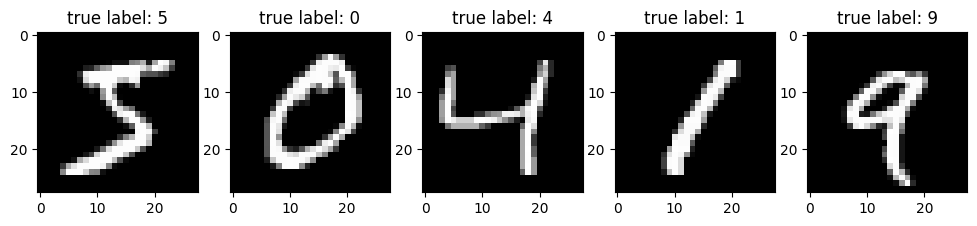

In [4]:
# visualize the 4 first mnist images
plt.figure(figsize=(12,12))
for i in range(0,5):
    plt.subplot(1,5,(i+1))
    plt.imshow((X_train[i,:,:,0]),cmap="gray")
    plt.title('true label: '+str(np.argmax(Y_train,axis=1)[i]))
    #plt.axis('off')

## fcNN as classification model for MNIST data
Now we want to train a fcNN to classify the MNIST data.
We use two network architectures:
* fcnn with no hidden layers
* fcnn with two hidden layers (100 and 50)


Because we will use fcNN we need to flatten our input into a 1d vector. We do this in the next cell with reshape.

In [5]:
# prepare data for fcNN - we need a vector as input

# first do it for original data
X_train_flat = X_train.reshape([X_train.shape[0], 784])
X_val_flat = X_val.reshape([X_val.shape[0], 784])
X_test_flat = X_test.reshape([X_test.shape[0], 784])

### Train the first fcNN on the data

In [6]:
# check the shape
X_train_flat.shape,Y_train.shape,X_val_flat.shape,Y_val.shape

((50000, 784), (50000, 10), (10000, 784), (10000, 10))

Here we define the network. In the output we predict the probability for the 10 digits with the softmax activation function.

In [7]:
# define fcNN with 2 hidden layers
model = Sequential()

model.add(Dense(10, input_shape=( 784,), activation="softmax"))

# compile model and intitialize weights
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

C:\Users\miche\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:
# summarize model along with number of model weights
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 10)             │         7,850 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,850 (30.66 KB)

 Trainable params: 7,850 (30.66 KB)

 Non-trainable params: 0 (0.00 B)

In [9]:
# train the model
history=model.fit(X_train_flat, Y_train,
                  batch_size=128,
                  epochs=10,
                  verbose=2,
                  validation_data=(X_val_flat, Y_val)
                 )

Epoch 1/10
391/391 - 3s - 7ms/step - accuracy: 0.8232 - loss: 0.7243 - val_accuracy: 0.9029 - val_loss: 0.3915
Epoch 2/10
391/391 - 3s - 7ms/step - accuracy: 0.8982 - loss: 0.3846 - val_accuracy: 0.9141 - val_loss: 0.3222
Epoch 3/10
391/391 - 2s - 6ms/step - accuracy: 0.9084 - loss: 0.3354 - val_accuracy: 0.9206 - val_loss: 0.2984
Epoch 4/10
391/391 - 3s - 7ms/step - accuracy: 0.9138 - loss: 0.3127 - val_accuracy: 0.9230 - val_loss: 0.2845
Epoch 5/10
391/391 - 3s - 6ms/step - accuracy: 0.9168 - loss: 0.2987 - val_accuracy: 0.9252 - val_loss: 0.2776
Epoch 6/10
391/391 - 2s - 6ms/step - accuracy: 0.9194 - loss: 0.2897 - val_accuracy: 0.9263 - val_loss: 0.2710
Epoch 7/10
391/391 - 2s - 6ms/step - accuracy: 0.9213 - loss: 0.2826 - val_accuracy: 0.9269 - val_loss: 0.2663
Epoch 8/10
391/391 - 3s - 7ms/step - accuracy: 0.9222 - loss: 0.2776 - val_accuracy: 0.9282 - val_loss: 0.2631
Epoch 9/10
391/391 - 2s - 6ms/step - accuracy: 0.9241 - loss: 0.2730 - val_accuracy: 0.9291 - val_loss: 0.2622
E

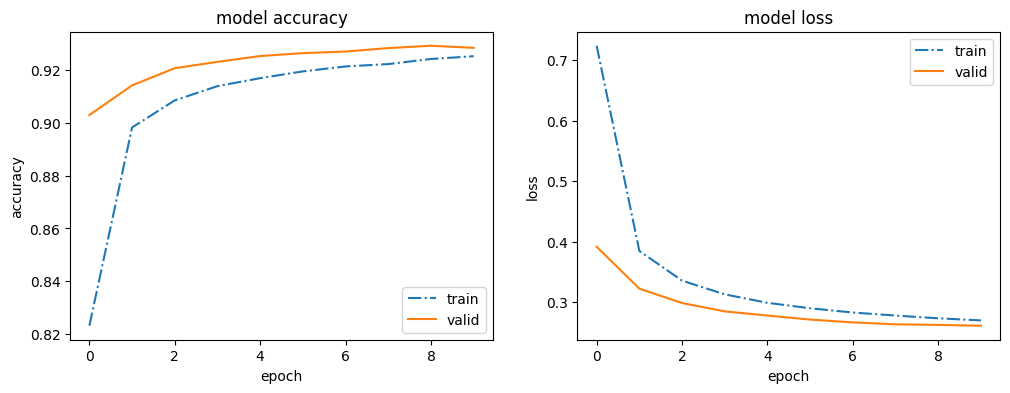

In [10]:
# plot the development of the accuracy and loss during training
plt.figure(figsize=(12,4))
plt.subplot(1,2,(1))
plt.plot(history.history['accuracy'],linestyle='-.')
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='lower right')
plt.subplot(1,2,(2))
plt.plot(history.history['loss'],linestyle='-.')
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper right')
plt.show()

#### Prediction on the test set

Now, let's use the fcNN that was trained to predict new unseen data (our testdata).
We determine the confusion matrix and the accuracy on the testdata to evaluate the classification performance.


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 860us/step
Accuracy =  0.9254


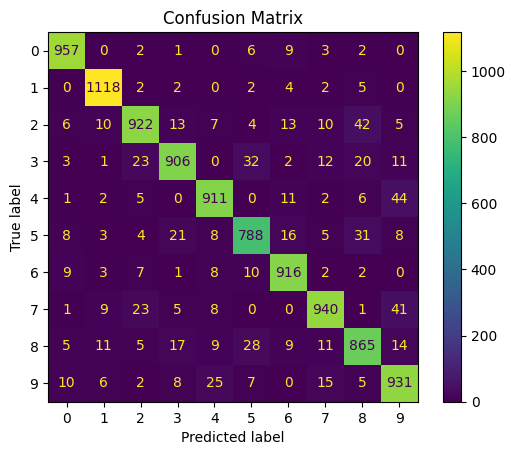

In [11]:
# predict each instance of the testset
pred=model.predict(X_test_flat)
# get confusion matrix
cm = confusion_matrix(np.argmax(Y_test, axis=1), np.argmax(pred, axis=1))

acc_fc = np.sum(np.argmax(Y_test,axis=1)==np.argmax(pred,axis=1))/len(pred)
print("Accuracy = " , acc_fc)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='viridis')
plt.title('Confusion Matrix')
plt.show()

### Train the second fcNN on the data

Now, we define the nework with two hidden layers (100, 50). We use the sigmoid activation function on the hidden layers. In the output we predict the probability for the 10 digits with the softmax activation function.

In [ ]:
# define fcNN with 2 hidden layers
model = Sequential()

model.add(Dense(100, input_shape=(784,)))
model.add(Activation('sigmoid'))
model.add(Dense(50))
model.add(Activation('sigmoid'))
model.add(Dense(10))
model.add(Activation('softmax'))

# compile model and intitialize weights
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

C:\Users\miche\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [13]:
# summarize model along with number of model weights
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_1 (Dense)                 │ (None, 100)            │        78,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 50)             │         5,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │           510 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 10)             │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 84,060 (328.36 KB)

 Trainable params: 84,060 (328.36 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# train the model
history=model.fit(X_train_flat, Y_train,
                  batch_size=128,
                  epochs=30,
                  verbose=2,
                  validation_data=(X_val_flat, Y_val)
                 )

TypeError: TorchTrainer.fit() got an unexpected keyword argument 'device'

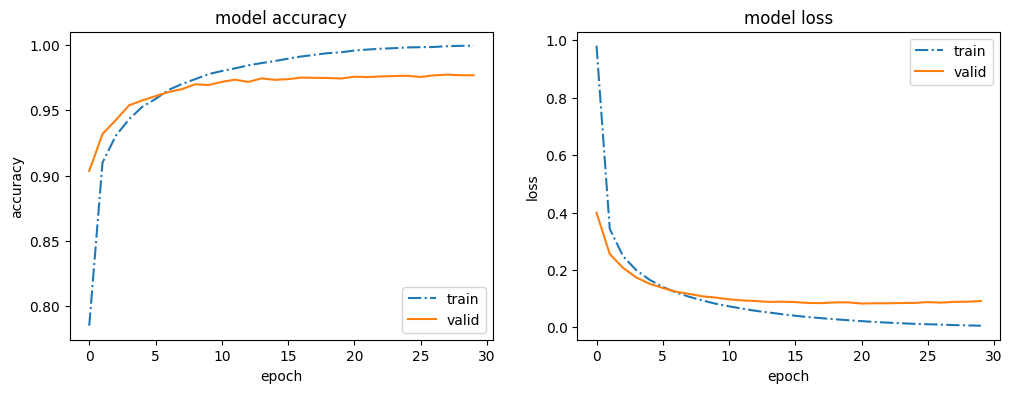

In [15]:
# plot the development of the accuracy and loss during training
plt.figure(figsize=(12,4))
plt.subplot(1,2,(1))
plt.plot(history.history['accuracy'],linestyle='-.')
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='lower right')
plt.subplot(1,2,(2))
plt.plot(history.history['loss'],linestyle='-.')
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper right')
plt.show()

Ziel ist, den Loss zu minimieren. Iterativer Prozess.

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Accuracy =  0.9761


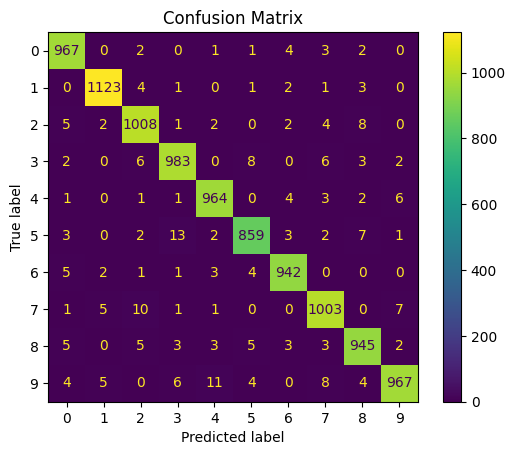

In [16]:
# predict each instance of the testset
pred=model.predict(X_test_flat)
# get confusion matrix
cm = confusion_matrix(np.argmax(Y_test, axis=1), np.argmax(pred, axis=1))

acc_fc = np.sum(np.argmax(Y_test,axis=1)==np.argmax(pred,axis=1))/len(pred)
print("Accuracy = " , acc_fc)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='viridis')
plt.title('Confusion Matrix')
plt.show()

### 🔧 **YOUR TASK:**


What do you observe when you compare the network with the hidden layers to the one without?  
  
Try to improve the fcNN by adding more hidden layers and/or changing the activation function from "sigmoid" to "relu". What do you observe?

### 🔑 **Solution:**


>



<details>
  <summary>🔑 Click here to View Answers:</summary>



- Accuracy increases with hidden layer, from ~ 0.93 to ~ 0.97 , while the loss (NLL) decreases from ~ 0.26 to ~ 0.1

- With ReLu, faster convergence is achieved

</details>

In [19]:
# @title Possible Network { display-mode: "form" }
#Possible new model
model = Sequential()

model.add(Dense(512, input_shape=(784,)))
model.add(Activation('relu'))
model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dense(10))
model.add(Activation('softmax'))

# compile model and intitialize weights
model.compile(loss='categorical_crossentropy',
              optimizer='adamw',
              metrics=['accuracy'])

In [20]:
# summarize model along with number of model weights
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_7 (Dense)                 │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_6 (Activation)       │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_7 (Activation)       │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_8 (Activation)       │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 10)             │         1,290 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_9 (Activation)       │ (None, 10)             │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 567,434 (2.16 MB)

 Trainable params: 567,434 (2.16 MB)

 Non-trainable params: 0 (0.00 B)

In [23]:
# train the model
history=model.fit(X_train_flat, Y_train,
                  batch_size=128,
                  epochs=15,
                  verbose=2,
                  validation_data=(X_val_flat, Y_val)
                 )

Epoch 1/15
391/391 - 4s - 9ms/step - accuracy: 0.9966 - loss: 0.0105 - val_accuracy: 0.9775 - val_loss: 0.0963
Epoch 2/15
391/391 - 4s - 9ms/step - accuracy: 0.9952 - loss: 0.0156 - val_accuracy: 0.9801 - val_loss: 0.0954
Epoch 3/15
391/391 - 3s - 9ms/step - accuracy: 0.9956 - loss: 0.0135 - val_accuracy: 0.9776 - val_loss: 0.1061
Epoch 4/15
391/391 - 4s - 9ms/step - accuracy: 0.9962 - loss: 0.0123 - val_accuracy: 0.9802 - val_loss: 0.0884
Epoch 5/15
391/391 - 3s - 9ms/step - accuracy: 0.9974 - loss: 0.0085 - val_accuracy: 0.9777 - val_loss: 0.0962
Epoch 6/15
391/391 - 4s - 9ms/step - accuracy: 0.9963 - loss: 0.0112 - val_accuracy: 0.9762 - val_loss: 0.1082
Epoch 7/15
391/391 - 4s - 9ms/step - accuracy: 0.9961 - loss: 0.0125 - val_accuracy: 0.9789 - val_loss: 0.0990
Epoch 8/15
391/391 - 4s - 10ms/step - accuracy: 0.9969 - loss: 0.0105 - val_accuracy: 0.9820 - val_loss: 0.0850
Epoch 9/15
391/391 - 4s - 10ms/step - accuracy: 0.9972 - loss: 0.0080 - val_accuracy: 0.9811 - val_loss: 0.0979

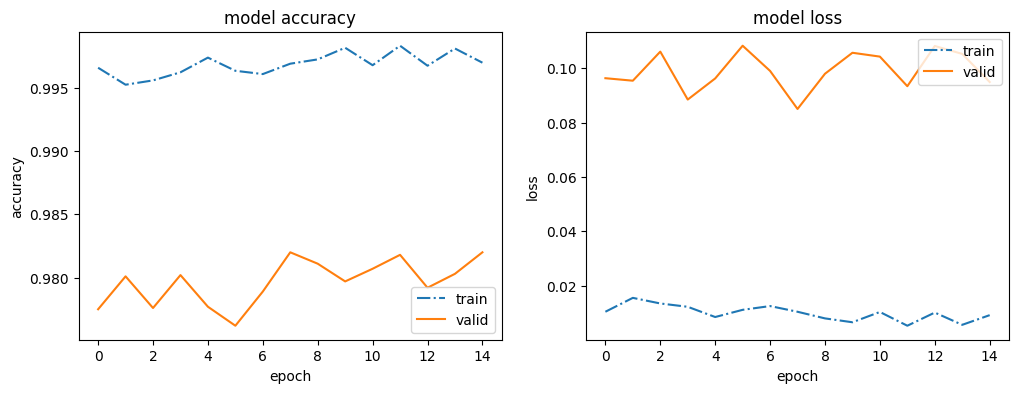

In [24]:
# plot the development of the accuracy and loss during training
plt.figure(figsize=(12,4))
plt.subplot(1,2,(1))
plt.plot(history.history['accuracy'],linestyle='-.')
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='lower right')
plt.subplot(1,2,(2))
plt.plot(history.history['loss'],linestyle='-.')
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper right')
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Accuracy =  0.9819


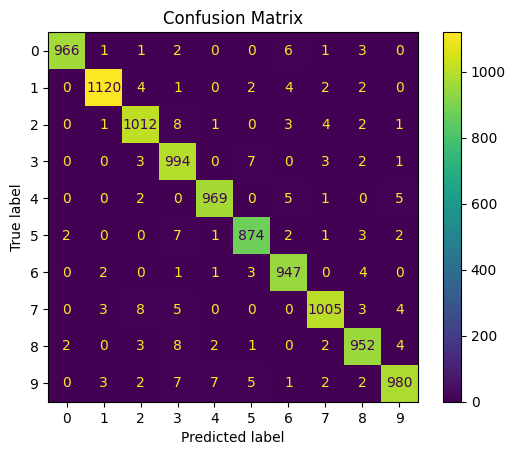

In [25]:
# predict each instance of the testset
pred=model.predict(X_test_flat)
# get confusion matrix
cm = confusion_matrix(np.argmax(Y_test, axis=1), np.argmax(pred, axis=1))

acc_fc = np.sum(np.argmax(Y_test,axis=1)==np.argmax(pred,axis=1))/len(pred)
print("Accuracy = " , acc_fc)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='viridis')
plt.title('Confusion Matrix')
plt.show()

In [27]:
# Real test of the model with a small app. User can draw a digit and the model will predict it.
#@title Draw a digit { display-mode: "form" }
%pip install opencv-python

import matplotlib.pyplot as plt
import numpy as np
import cv2


   ---------------------------------------- 0.0/39.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/39.5 MB ? eta -:--:--
   ---- ----------------------------------- 4.5/39.5 MB 26.7 MB/s eta 0:00:02
   ----------- ---------------------------- 11.3/39.5 MB 30.6 MB/s eta 0:00:01
   ------------------ --------------------- 18.6/39.5 MB 31.7 MB/s eta 0:00:01
   ------------------------- -------------- 25.4/39.5 MB 32.9 MB/s eta 0:00:01
   --------------------------------- ------ 32.8/39.5 MB 33.0 MB/s eta 0:00:01
   ---------------------------------------  39.3/39.5 MB 33.8 MB/s eta 0:00:01
   ---------------------------------------- 39.5/39.5 MB 32.2 MB/s eta 0:00:00


In [37]:
# Application to draw a digit and predict it with the model.
# User draws a digit with its mouse (lines) on a black field with 28x28 pixels
# Pixels are shown bigger (1 pixel is 10x10 pixels) to see the digit better.
# The digit is then resized to 28x28 pixels and passed to the model to predict it.
# User clicks on the button "Predict" to predict it.



def predict_digit():
    # Create a button to predict the digit
    button = plt.Button(plt.gca(), "Predict")
    button.on_clicked(lambda event: draw_digit())

    # Show the button
    plt.show()

def main():
    # Create a figure to draw the digit
    plt.figure(figsize=(5, 5))
    plt.title("Draw a digit (press 'q' to finish)")
    plt.axis("off")

    # Call the predict_digit function to start drawing and predicting
    predict_digit()

def draw_digit():
    # Get the current figure and axis
    fig = plt.gcf()
    ax = plt.gca()

    # Create a black image to draw the digit
    img = np.zeros((280, 280), dtype=np.uint8)

    # Draw the digit on the image using mouse events
    def draw(event):
        if event.xdata is not None and event.ydata is not None:
            x, y = int(event.xdata), int(event.ydata)
            cv2.circle(img, (x, y), 5, 255, -1)

    # Connect the mouse event to the draw function
    cid = fig.canvas.mpl_connect("button_press_event", draw)

    # Show the image until 'q' is pressed
    while True:
        cv2.imshow("Draw a digit", img)
        if cv2.waitKey(1) & 0xFF == ord("q"):
            break

    # Disconnect the mouse event
    fig.canvas.mpl_disconnect(cid)

    # Resize the image to 28x28 pixels
    img_resized = cv2.resize(img, (28, 28))

    # Normalize the image and reshape it for prediction
    img_normalized = img_resized / 255.0
    img_reshaped = img_normalized.reshape(1, 784)

    # Predict the digit using the model
    prediction = model.predict(img_reshaped)
    predicted_digit = np.argmax(prediction)

    # Show the predicted digit
    print(f"Predicted digit: {predicted_digit}")


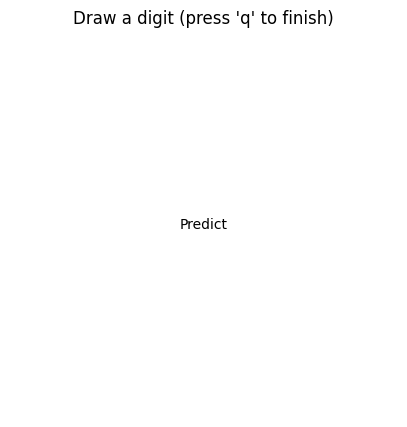

: 

In [ ]:
main()